# Deviance of both methods

[ 0.01435102 -0.00637839]
[0.95450669 0.21344271]
[-0.96885771 -0.20706432]


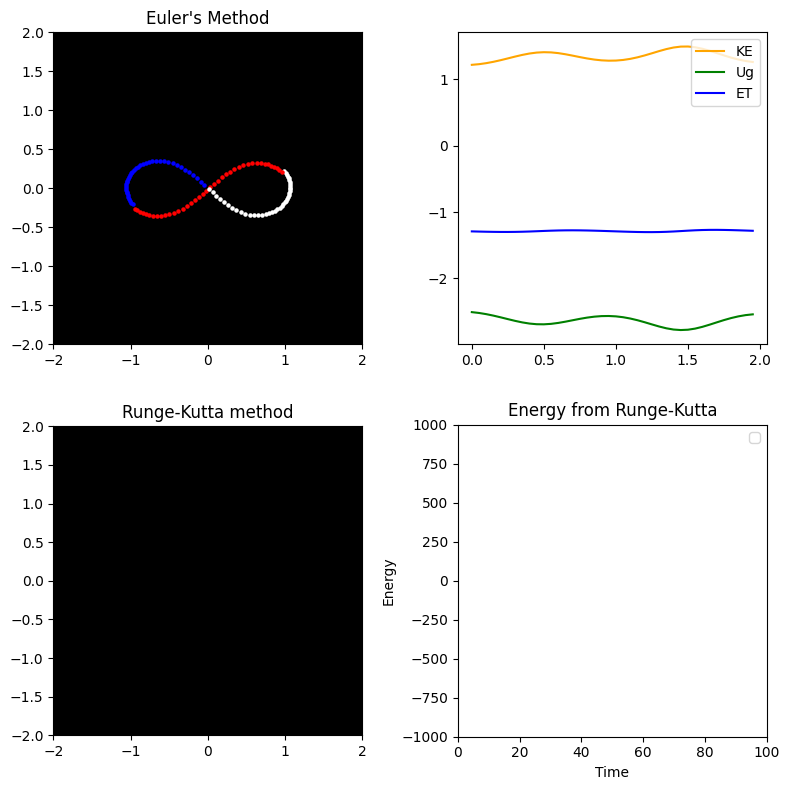

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from IPython.display import display, clear_output
import time

# Fixed values for gravitational constant and masses
G = 1.0
m1, m2, m3 = 1.0, 1.0, 1.0

class Planet:
    def __init__(self, mass, pos, radius=0.1, v=[0, 0]):
        self.mass = mass
        self.pos = np.array(pos, dtype=float)
        self.v = np.array(v, dtype=float)
        self.radius = radius

def gravity_acceleration(planet1, planet2):
    d = planet2.pos - planet1.pos
    r = np.linalg.norm(d)
    if r <= (planet1.radius + planet2.radius):
        raise ValueError('Collision has occurred!')
    magnitude = (G * planet1.mass * planet2.mass) / r**2
    vector = magnitude * d / r
    a = vector / planet1.mass
    return a

def update_position(planet, dt):
    planet.pos += planet.v * dt
    np.append(new_array,planet.pos)
    print(planet.pos)

def KE(planets):
    return sum(0.5 * planet.mass * np.linalg.norm(planet.v)**2 for planet in planets)

def U(planets):
    return sum(
        -G * planets[i].mass * planets[j].mass / np.linalg.norm(planets[i].pos - planets[j].pos)
        for i in range(len(planets)) for j in range(i + 1, len(planets))
    )

def three_body_eq(t, y, G, m1, m2, m3):
    x1, y1, x2, y2, x3, y3 = y[0:6]
    vx1, vy1, vx2, vy2, vx3, vy3 = y[6:12]
    r12 = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    r13 = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
    r23 = np.sqrt((x3 - x2)**2 + (y3 - y2)**2)
    
    ax1 = G * m2 * (x2 - x1) / r12**3 + G * m3 * (x3 - x1) / r13**3
    ay1 = G * m2 * (y2 - y1) / r12**3 + G * m3 * (y3 - y1) / r13**3
    
    ax2 = G * m1 * (x1 - x2) / r12**3 + G * m3 * (x3 - x2) / r23**3
    ay2 = G * m1 * (y1 - y2) / r12**3 + G * m3 * (y3 - y2) / r23**3
    
    ax3 = G * m1 * (x1 - x3) / r13**3 + G * m2 * (x2 - x3) / r23**3
    ay3 = G * m1 * (y1 - y3) / r13**3 + G * m2 * (y2 - y3) / r23**3
    
    return [vx1, vy1, vx2, vy2, vx3, vy3, ax1, ay1, ax2, ay2, ax3, ay3]

def setup(planetList):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
    
    ax1.set_ylim((-2, 2))
    ax1.set_xlim((-2, 2))
    ax1.set_title("Euler's Method")
    ax1.set_facecolor('black')

    ax2.set_title('Energy form Euler')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Energy')
    ax2.set_ylim((-1000, 1000))
    ax2.set_xlim((0, 100))
    ax2.legend(['KE', 'Ug', 'ET'], loc='upper right')

    ax3.set_title("Runge-Kutta method")
    ax3.set_xlim(-2, 2)
    ax3.set_ylim(-2, 2)
    ax3.set_aspect('equal')
    ax3.set_facecolor('black')

    ax4.set_title('Energy from Runge-Kutta')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Energy')
    ax4.set_ylim((-1000, 1000))
    ax4.set_xlim((0, 100))
    ax4.legend(['KE', 'Ug', 'ET'], loc='upper right')
    plt.tight_layout() 
    return fig, ax1, ax2, ax3, ax4
new_array = np.array 
def animate(planet1, planet2, planet3, dt, iterations):
    fig, ax1, ax2, ax3, ax4 = setup([planet1, planet2, planet3])
    kinetic = []
    potential = []
    
    # Initialize arrays to store positions of the planets
    planet1_positions = []
    planet2_positions = []
    planet3_positions = []

    # Run the simulation loop
    for iteration in range(iterations):
        a12 = gravity_acceleration(planet1, planet2)
        a21 = gravity_acceleration(planet2, planet1)
        a13 = gravity_acceleration(planet1, planet3)
        a31 = gravity_acceleration(planet3, planet1)
        a23 = gravity_acceleration(planet2, planet3)
        a32 = gravity_acceleration(planet3, planet2)

        # Update velocities
        planet1.v += (a12 + a13) * dt
        planet2.v += (a21 + a23) * dt
        planet3.v += (a31 + a32) * dt

        # Update positions
        update_position(planet1, dt)
        update_position(planet2, dt)
        update_position(planet3, dt)

        # Store positions into the arrays
        planet1_positions.append(planet1.pos.copy())
        planet2_positions.append(planet2.pos.copy())
        planet3_positions.append(planet3.pos.copy())

        # Visualization logic (as in your original code)
        ax1.scatter(planet1.pos[0], planet1.pos[1], color='white', s=planet1.radius * 50)
        ax1.scatter(planet2.pos[0], planet2.pos[1], color='red', s=planet2.radius * 50)
        ax1.scatter(planet3.pos[0], planet3.pos[1], color='blue', s=planet3.radius * 50)

        # Energy calculations (as in your original code)
        Kt = KE([planet1, planet2, planet3])
        Ut = U([planet1, planet2, planet3])
        kinetic.append(Kt)
        potential.append(Ut)

        # Update plots
        ax2.clear()
        ax2.plot(np.arange(iteration + 1) * dt, kinetic, label='KE', c='orange')
        ax2.plot(np.arange(iteration + 1) * dt, potential, label='Ug', c='g')
        ax2.plot(np.arange(iteration + 1) * dt, np.array(kinetic) + np.array(potential), label='ET', c='b')
        ax2.legend(loc='upper right')

        display(fig)
        clear_output(wait=True)
        time.sleep(0.01)

    plt.close()

    # Convert the position lists to numpy arrays for easier manipulation
    planet1_positions = np.array(planet1_positions)
    planet2_positions = np.array(planet2_positions)
    planet3_positions = np.array(planet3_positions)
    
    return planet1_positions, planet2_positions, planet3_positions

sun = Planet(1, (0.970, 0.243), radius=0.1, v=[0.466, -0.4320])
mars = Planet(1, (-0.970, -0.243), radius=0.1, v=[0.466, -0.432])
moon = Planet(1, (0.0, 0.0), radius=0.1, v=[-2 * 0.466, 2 * 0.432])

x1, x2, x3 = animate(sun, mars, moon, 0.05, 40)

In [51]:
x1[0:,0:]

array([[ 0.99026852,  0.22064057],
       [ 1.00770009,  0.19774721],
       [ 1.02248409,  0.17449292],
       [ 1.03479723,  0.15100665],
       [ 1.04479869,  0.12738128],
       [ 1.05262699,  0.10368077],
       [ 1.0583981 ,  0.07994644],
       [ 1.06220428,  0.0562023 ],
       [ 1.06411336,  0.03245974],
       [ 1.0641683 ,  0.00872157],
       [ 1.06238678, -0.01501429],
       [ 1.05876074, -0.03875138],
       [ 1.053256  , -0.0624912 ],
       [ 1.04581173, -0.08622961],
       [ 1.03633988, -0.10995263],
       [ 1.02472466, -0.13363166],
       [ 1.0108222 , -0.1572176 ],
       [ 0.99446067, -0.18063369],
       [ 0.9754414 , -0.2037667 ],
       [ 0.95354161, -0.22645619],
       [ 0.92852014, -0.24848188],
       [ 0.90012739, -0.2695493 ],
       [ 0.86812185, -0.28927491],
       [ 0.8322952 , -0.30717313],
       [ 0.79250806, -0.32264973],
       [ 0.74873625, -0.33500867],
       [ 0.70112311, -0.34348114],
       [ 0.65002672, -0.34728504],
       [ 0.59604286,

In [11]:
x2


array([[-0.94366852, -0.26384057],
       [-0.91409593, -0.28362778],
       [-0.88109039, -0.30199245],
       [-0.84449995, -0.31848365],
       [-0.80424131, -0.33256869],
       [-0.760334  , -0.34364418],
       [-0.7129359 , -0.35106314],
       [-0.66237198, -0.35418167],
       [-0.60914517, -0.35242373],
       [-0.55391776, -0.34535511]])

In [12]:
x3

array([[-0.0466    ,  0.0432    ],
       [-0.09360417,  0.08588056],
       [-0.1413937 ,  0.12749952],
       [-0.19029728,  0.167477  ],
       [-0.24055738,  0.20518741],
       [-0.29229299,  0.2399634 ],
       [-0.34546221,  0.2711167 ],
       [-0.39983229,  0.29797937],
       [-0.45496818,  0.31996399],
       [-0.51025055,  0.33663353]])